#Clustering with iPython

##Introduction
**Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar to each other than to those in other groups (**clusters**). *Clustering* is a method used for exploratory data analysis, which is used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, and bioinformatics. 

*Clustering* can be used to discover structures in data without providing an explanation or interpretation.
*Clustering* or ***cluster analysis*** is not a specific algorithm, rather it is a task.  First used by Tryon, 1939, it encompasses a number of different algorithms and methods for grouping objects of similar kind into respective categories.

An example where *clustering* might be used is in the field of psychiatry, where the characterization of patients on the basis of clusters of symptoms can be useful in the identification of an appropriate form of therapy. In marketing, it may be useful to identify distinct groups of potential customers so that, for example, advertising can be appropriately targeted.

##Clustering Example
We will use the example in the field of psychiatry here. The Ginzberg dataset is comprised of data for psychiatric patients hospitalized for depression. It is part of the R car-package consisting of  a data frame with 82 rows and 6 columns. It can be downloaded at:

* CSV Format: https://vincentarelbundock.github.io/Rdatasets/csv/car/Ginzberg.csv

* TXT FormatL http://socserv.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Greene.txt 


##Dataset
The data are for psychiatric patients hospitalized for depression.

* simplicity: 
    Measures subject's need to see the world in black and white.
* fatalism: 
    Fatalism scale.
* depression: 
    Beck self-report depression scale.
* adjsimp: 
    Adjusted Simplicity - Simplicity adjusted (by regression) for other variables thought to influence depression.
* adjfatal: 
    Adjusted Fatalism.
* adjdep: 
    Adjusted Depression. 

##Import Nodules
Before we begin writing and executing Phython code, we need to ensure we have the necessary external modules loaded or we will have a frustratng day. We will use ***Numpy***, ***Pandas***, ***Scipy*** and ***Matplotlib***. Something I will show you here that I have not in other labs is how to call a funtion from ***Numpy*** without the prefix **np**. For example, if we want to put our data into an array (and we do) we would call **np.arry** when ***Numpy*** is loaded. I alwsy forget the **np** prefix. Here we will use **"from numpy import array"** and then be able to just call **array**. We will also do this for **kmeans** and **vq** from ***scipy.cluster.vq***.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from scipy.cluster.vq import kmeans,vq

##Load the Dataset
We will load the Ginzberg dataset using Pandos with its **read_csv** function. Then we will look at the shape to verify the number of rows and columns.

In [47]:
data = pd.read_csv("C:/Users/Strickland/Documents/Python Scripts/Ginzberg.csv")
print(data.shape)

(82, 6)


##Configure the Data
We need to place the data from Ginzberg.csv into a **np.array** or simple **array** in order to perform clustering.

In [48]:
# put the data into an np.array with floating pint for the datatype
X = array(data, dtype='f')

##Perform k-Means Clustering
We will use **kmeans** from scipy.clsuter.vq to perform k-Means cluster analysis.

In [53]:
# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(X,2)
# assign each sample to a cluster
idx,_ = vq(X,centroids)

##Plotting the Clusters
We now plot the clsuters derived from kmeans. We want to plot these within the Notebook.

<IPython.core.display.Javascript object>


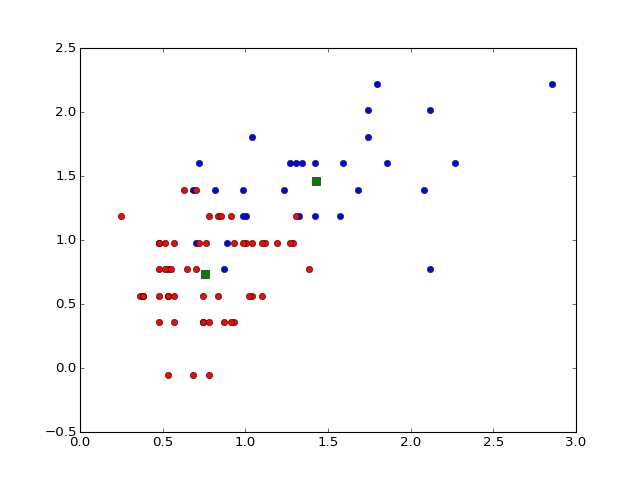

In [54]:
%matplotlib notebook 
# some plotting using numpy's logical indexing
plt.plot(X[idx==0,0],X[idx==0,1],'ob',
     X[idx==1,0],X[idx==1,1],'or')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()

Now we use KMeans algorithm of scikit-learn to perform the clustering.

In [191]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4, max_iter=100, verbose=1) 
fit = kmeans.fit(data)
fit

Initialization complete
Iteration  0, inertia 59.080
Iteration  1, inertia 45.095
Iteration  2, inertia 43.451
Iteration  3, inertia 43.236
Iteration  4, inertia 43.157
Converged at iteration 4
Initialization complete
Iteration  0, inertia 64.971
Iteration  1, inertia 45.620
Iteration  2, inertia 42.822
Iteration  3, inertia 40.634
Iteration  4, inertia 40.078
Iteration  5, inertia 39.908
Iteration  6, inertia 39.804
Converged at iteration 6
Initialization complete
Iteration  0, inertia 62.113
Iteration  1, inertia 48.737
Iteration  2, inertia 47.746
Iteration  3, inertia 44.770
Iteration  4, inertia 41.546
Iteration  5, inertia 39.958
Iteration  6, inertia 39.843
Converged at iteration 6
Initialization complete
Iteration  0, inertia 71.041
Iteration  1, inertia 50.267
Iteration  2, inertia 45.286
Iteration  3, inertia 42.956
Iteration  4, inertia 41.556
Iteration  5, inertia 40.696
Iteration  6, inertia 39.960
Iteration  7, inertia 39.887
Converged at iteration 7
Initialization comple

KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=1)

In [192]:
clusters = kmeans.predict(data)
clusters.shape

(82L,)

The centroids provide an aggregate representation and a characterization of each cluster.

In [193]:
t = kmeans.cluster_centers_
print t

[[ 0.82607188  1.067885    0.60879125  0.92260688  1.19103812  0.66781938]
 [ 1.030895    1.14000964  1.32298679  0.89626929  1.0340825   1.25243143]
 [ 0.631006    0.463592    0.5289476   0.7103472   0.5114508   0.5799924 ]
 [ 1.85712923  1.64644615  1.69169769  1.87569692  1.63098385  1.67284692]]


Let's also convert the target labels to integers:

In [226]:
target = np.genfromtxt('C:/Users/Strickland/Documents/Python Scripts/Ginzberg.csv',delimiter=',',usecols=None,names=True,dtype=str)
t = np.zeros(len(target),dtype=int)
t[target == 'simplicity'] = 1
t[target == 'fatalism'] = 2
t[target == 'depression'] = 3
t[target == 'adjsimp'] = 4
t[target == 'adjfatal'] = 5
t[target == 'adjdep'] = 6
t.shape

(82L,)

Homogeneity: each cluster contains only members of a single class. Completeness: all members of a given class are assigned to the same cluster.

In [196]:
from sklearn.metrics import completeness_score, homogeneity_score
print completeness_score(t,clusters)

0.0109399800015


In [197]:
print homogeneity_score(t,clusters)

0.222566710701


The completeness score approaches 1 when most of the data points that are members of a given class are elements of the same cluster while the homogeneity score approaches 1 when all the clusters contain almost only data points that are member of a single class.

In [198]:
print kmeans.cluster_centers_

[[ 0.82607188  1.067885    0.60879125  0.92260688  1.19103812  0.66781938]
 [ 1.030895    1.14000964  1.32298679  0.89626929  1.0340825   1.25243143]
 [ 0.631006    0.463592    0.5289476   0.7103472   0.5114508   0.5799924 ]
 [ 1.85712923  1.64644615  1.69169769  1.87569692  1.63098385  1.67284692]]


Now, let's look at the Iris Data set

In [292]:
data = np.genfromtxt('C:/Users/Strickland/Documents/Python Scripts/iris.csv',delimiter=',',usecols=(0,1,2,3), dtype='f')

In [307]:
data.shape

(150L, 4L)

In [294]:
target = np.genfromtxt('C:/Users/Strickland/Documents/Python Scripts/iris.csv',delimiter=',',usecols=(4),dtype=str)

In [295]:
print set(target) # build a collection of unique elements

set(['setosa', 'versicolor', 'virginica'])


This snippet uses the first and the third dimension (sepal length and sepal width) and the result is shown in the following figure:

<IPython.core.display.Javascript object>


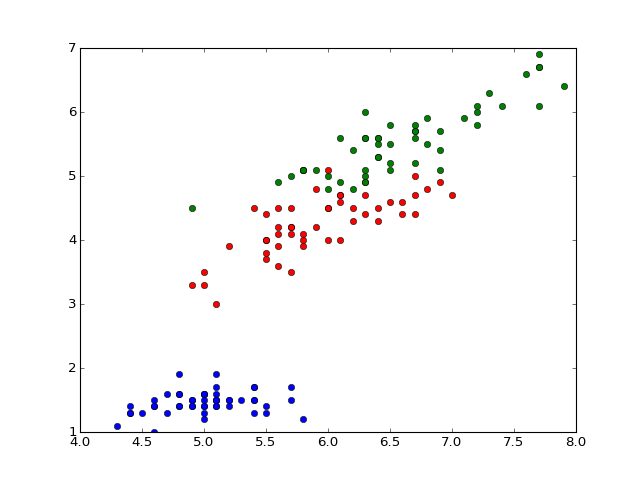

In [296]:
%matplotlib notebook 
plt.plot(data[target=='setosa',0],data[target=='setosa',2],'bo')
plt.plot(data[target=='versicolor',0],data[target=='versicolor',2],'ro')
plt.plot(data[target=='virginica',0],data[target=='virginica',2],'go')
plt.show()

In the graph we have 150 points and their color represents the class; the blue points represent the samples that belong to the specie setosa, the red ones represent versicolor and the green ones represent virginica. Next let's see if through clustering we can obtain the correct classes.

In [297]:
from sklearn.cluster import KMeans 
iris_kmeans = KMeans(n_clusters=3, max_iter=500, verbose=1, n_init=5) # initialization
iris_kmeans.fit(data)

Initialization complete
Iteration  0, inertia 129.390
Iteration  1, inertia 79.192
Iteration  2, inertia 78.851
Converged at iteration 2
Initialization complete
Iteration  0, inertia 132.480
Iteration  1, inertia 96.317
Iteration  2, inertia 86.294
Iteration  3, inertia 79.864
Iteration  4, inertia 79.197
Iteration  5, inertia 78.851
Converged at iteration 5
Initialization complete
Iteration  0, inertia 131.540
Iteration  1, inertia 84.144
Iteration  2, inertia 83.390
Iteration  3, inertia 82.004
Iteration  4, inertia 81.081
Iteration  5, inertia 79.874
Iteration  6, inertia 79.344
Iteration  7, inertia 78.921
Iteration  8, inertia 78.856
Converged at iteration 8
Initialization complete
Iteration  0, inertia 160.830
Iteration  1, inertia 79.708
Iteration  2, inertia 78.910
Iteration  3, inertia 78.851
Converged at iteration 3
Initialization complete
Iteration  0, inertia 285.360
Iteration  1, inertia 95.617
Iteration  2, inertia 80.645
Iteration  3, inertia 79.012
Iteration  4, inertia

KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=3, n_init=5,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=1)

In [298]:
c = iris_kmeans.predict(data)
c.shape

(150L,)

In [299]:
tgt = kmeans.cluster_centers_
print tgt

[[ 0.82607188  1.067885    0.60879125  0.92260688  1.19103812  0.66781938]
 [ 1.030895    1.14000964  1.32298679  0.89626929  1.0340825   1.25243143]
 [ 0.631006    0.463592    0.5289476   0.7103472   0.5114508   0.5799924 ]
 [ 1.85712923  1.64644615  1.69169769  1.87569692  1.63098385  1.67284692]]


Let's also convert the target labels to integers:

In [303]:
t = np.zeros(len(target),dtype=int)
t[target == 'setosa'] = 1
t[target == 'versicolor'] = 0
t[target == 'virginica'] = 2

In [304]:
print set(target)

set(['setosa', 'versicolor', 'virginica'])


<IPython.core.display.Javascript object>


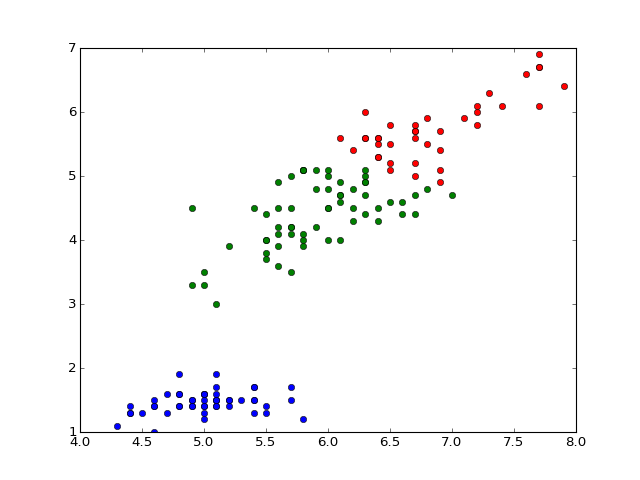

In [306]:
%matplotlib notebook 
plt.plot(data[c==1,0],data[c==1,2],'ro')
plt.plot(data[c==0,0],data[c==0,2],'bo')
plt.plot(data[c==2,0],data[c==2,2],'go')
plt.show()

plt.show()

<IPython.core.display.Javascript object>


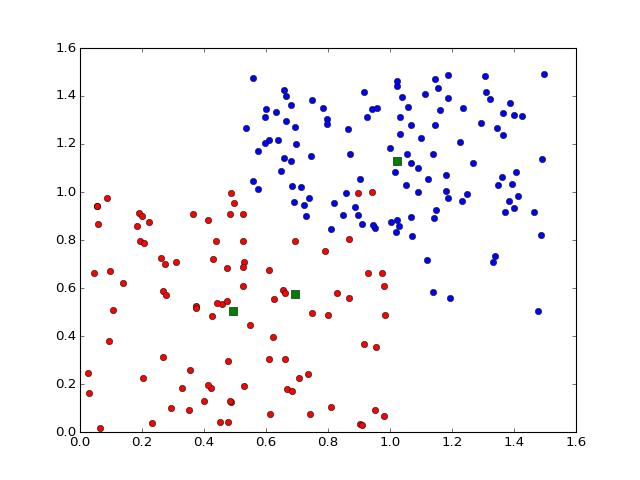

In [18]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
%matplotlib notebook

# data generation
data = vstack((rand(150,3) + array([.5,.5,.5]),rand(150,3)))

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [45]:
X = array(data, dtype='f')
X

array([[ 0.92983001,  0.35589001,  0.59869999,  0.75933999,  0.10673   ,
         0.41865   ],
       [ 0.91096997,  1.18438995,  0.72786999,  0.72716999,  0.99914998,
         0.51687998],
       [ 0.53365999, -0.05837   ,  0.53411001,  0.62176001,  0.03811   ,
         0.70699   ],
       [ 0.74118   ,  0.35589001,  0.56641001,  0.83521998,  0.42218   ,
         0.65639001],
       [ 0.53365999,  0.77013999,  0.50182003,  0.47696999,  0.81423002,
         0.53517997],
       [ 0.62799001,  1.39152002,  0.56641001,  0.40663999,  1.23260999,
         0.34042001],
       [ 0.77890998,  0.35589001,  0.46952999,  0.84556001,  0.29789001,
         0.42168   ],
       [ 0.8355    ,  0.56300998,  0.53411001,  1.49960995,  1.20366001,
         1.08126998],
       [ 0.51480001,  0.77013999,  0.46952999,  0.31082001,  0.65651   ,
         0.36337   ],
       [ 0.87322998,  0.35589001,  0.46952999,  1.40836   ,  0.85391003,
         0.91711003],
       [ 0.53365999,  0.56300998,  0.46952999,  0.